In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

from sklearn import datasets
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from decisionregion import plot_decision_regions

In [4]:
diabetes = datasets.load_diabetes()
iris = datasets.load_iris()

In [5]:
df_iris = pd.DataFrame({'A':iris.data[:,0],'B':iris.data[:,1],'C':iris.data[:,2],'D':iris.data[:,3],'E':iris.target})
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df_iris.columns = ["sepal length", "sepal width", "petal length", "petal width", "class label"]
df_iris.head(5)

,sepal length,sepal width,petal length,petal width,class label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Creating our Training Set

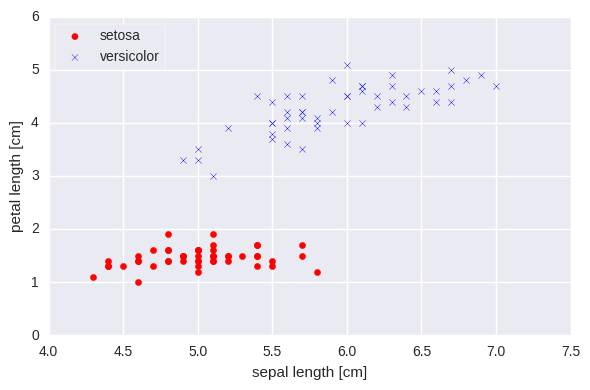

In [6]:
X = df_iris.iloc[0:100, [0,2]].values
y = df_iris.iloc[0:100, 4].values
y = np.where(y==0 , -1, 1)

plt.figure(figsize=(6,4))

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left',frameon=True)

plt.tight_layout()
#plt.savefig('./images/02_06.png', dpi=300)
plt.show()

# Training our Perceptron Model

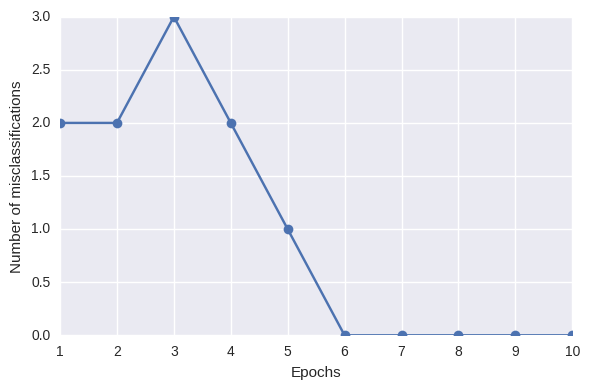

In [7]:
from Perceptron import Perceptron

ppn = Perceptron(eta=0.1)
ppn.fit(X,y)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

# Some Predictions

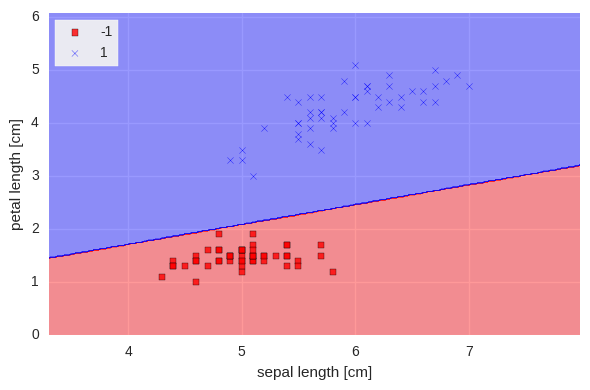

In [8]:
plt.figure(figsize=(6,4))
plot_decision_regions(X, y, classifier=ppn, plt=plt)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left',frameon=True)

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

# ADApive LInear NEuron

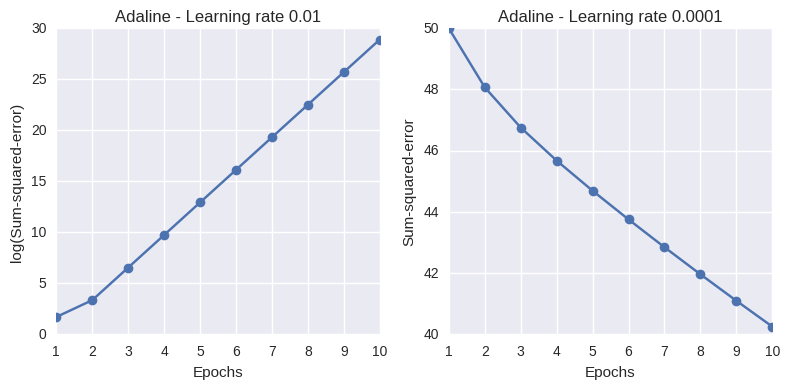

In [9]:
from AdalineGD import AdalineGD

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
# plt.savefig('./adaline_1.png', dpi=300)
plt.show()

In [13]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

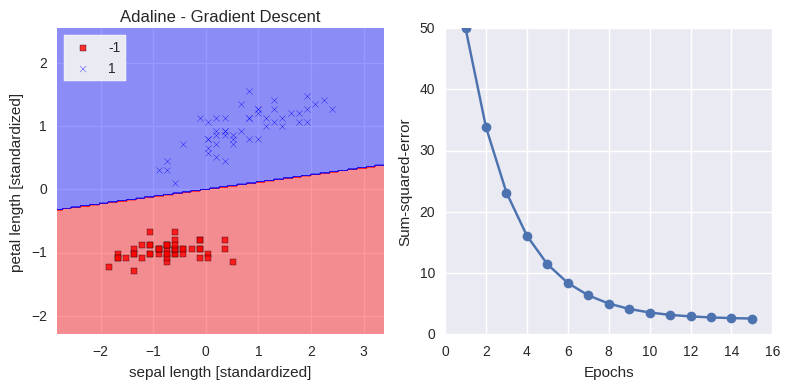

In [14]:
ada = AdalineGD(eta=0.01, n_iter=15)
ada.fit(X_std, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

plot_decision_regions(X_std, y, classifier=ada, plt=ax[0])
ax[0].set_title('Adaline - Gradient Descent')
ax[0].set_xlabel('sepal length [standardized]')
ax[0].set_ylabel('petal length [standardized]')
ax[0].legend(loc='upper left',frameon=True)
#plt.tight_layout()
# plt.savefig('./adaline_2.png', dpi=300)
#plt.show()

ax[1].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()

# Stochastic Gradient Descent

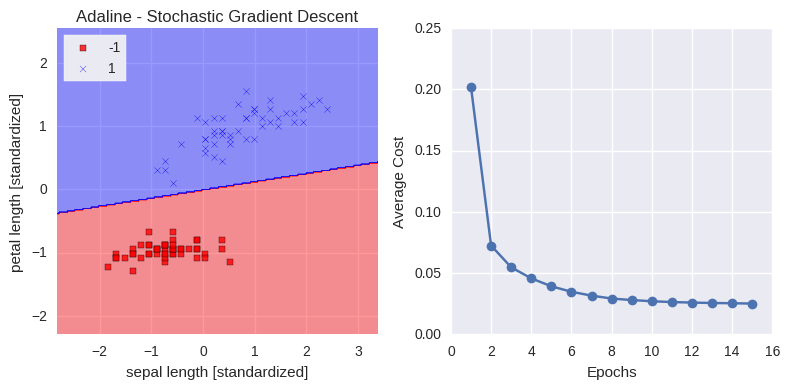

In [15]:
from AdalineSGD import AdalineSGD

ada = AdalineSGD(eta=0.01, n_iter=15, random_state=1)
ada.fit(X_std, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

plot_decision_regions(X_std, y, classifier=ada, plt=ax[0])
ax[0].set_title('Adaline - Stochastic Gradient Descent')
ax[0].set_xlabel('sepal length [standardized]')
ax[0].set_ylabel('petal length [standardized]')
ax[0].legend(loc='upper left', frameon=True)

ax[1].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('./adaline_5.png', dpi=300)
plt.show()

# Logistic Regression

In [16]:
from Logit import LogisticRegressionGD

from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data[:100, [0, 2]], iris.target[:100]

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

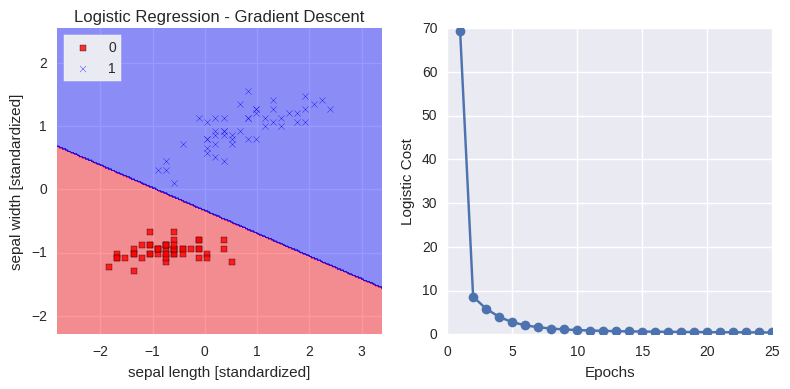

In [17]:
lr = LogisticRegressionGD(eta=0.15, n_iter=25)
lr.fit(X_std, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
plot_decision_regions(X_std, y, classifier=lr, plt=ax[0])
ax[0].set_title('Logistic Regression - Gradient Descent')
ax[0].set_xlabel('sepal length [standardized]')
ax[0].set_ylabel('sepal width [standardized]')
ax[0].legend(loc='upper left', frameon=True)

ax[1].plot(range(1, len(lr.cost_) + 1), lr.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Logistic Cost')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()